In [1]:
# Import packages
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Read data
data = np.genfromtxt("2-class-data.csv", delimiter=',')
np.random.shuffle(data)

# Quick look at the data
print(data)
print(data.shape)

[[-3.187  0.71   0.   ]
 [ 2.42   4.533  1.   ]
 [-0.113  5.978  1.   ]
 ..., 
 [-2.216 -4.369  1.   ]
 [-1.389  5.058  1.   ]
 [ 0.811  3.324  0.   ]]
(800, 3)


In [3]:
# We separate the training/validation/testing data
training_data = data[0:700]
validation_data = data[700:750]
testing_data = data[750:800]

In [4]:
# We separate the training 
training_x, training_y = training_data[:,0:2], training_data[:,2:3]
validation_x, validation_y = validation_data[:,0:2], validation_data[:,2:3]
testing_x, testing_y = testing_data[:,0:2], testing_data[:,2:3]

In [5]:
# We prescribe the model function and loss function
x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

b1 = tf.Variable(tf.random_normal([4]), name='b1')
b2 = tf.Variable(tf.random_normal([1]), name='b2')

w1 = tf.Variable(tf.random_normal([2, 4]), name='w1')
w2 = tf.Variable(tf.random_normal([4, 1]), name='w2')

out1 = tf.nn.sigmoid(tf.matmul(x, w1) + b1)
out2 = tf.nn.sigmoid(tf.matmul(out1, w2) + b2) # This is our f!

loss = tf.reduce_mean((out2 - y) * (out2 - y))

In [6]:
session = tf.Session()

In [7]:
init_op = tf.global_variables_initializer()

In [8]:
session.run(init_op)

In [9]:
session.run(out2, feed_dict={x: [[0,0]]})

array([[ 0.94679976]], dtype=float32)

In [10]:
session.run(out2, feed_dict={x: [[5,5]]})

array([[ 0.92984009]], dtype=float32)

In [11]:
session.run(loss, feed_dict={x: training_x, y: training_y})

0.44219595

In [12]:
session.run(loss, feed_dict={x: validation_x, y: validation_y})

0.55910981

In [13]:
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [14]:
for __ in range(10):
    for _ in range(10000):
        session.run(trainer, feed_dict={x: training_x, y: training_y})
    training_loss = session.run(loss, feed_dict={x: training_x, y: training_y})
    validation_loss = session.run(loss, feed_dict={x: validation_x, y: validation_y})
    print("training loss: %.3f, validation loss: %.3f" % (training_loss, validation_loss))

training loss: 0.183, validation loss: 0.171
training loss: 0.143, validation loss: 0.120
training loss: 0.093, validation loss: 0.089
training loss: 0.063, validation loss: 0.060
training loss: 0.051, validation loss: 0.048
training loss: 0.045, validation loss: 0.043
training loss: 0.041, validation loss: 0.040
training loss: 0.038, validation loss: 0.039
training loss: 0.036, validation loss: 0.039
training loss: 0.034, validation loss: 0.039


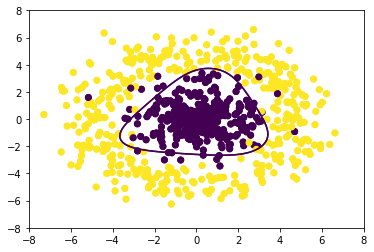

In [16]:
# Plot the data points and the contour (decision boundary)
cx = np.linspace(-8, 8, num=100)
cy = np.linspace(-8, 8, num=100)
gx, gy = np.meshgrid(cx, cy)
gz = session.run(out2, feed_dict={x: np.concatenate([gx.reshape(10000, 1), gy.reshape(10000, 1)], axis=1)}).reshape(100, 100)
plt.contour(gx, gy, gz, 1)
plt.scatter(data[:,0], data[:,1], c=data[:,2])
plt.show()